<a href="https://colab.research.google.com/github/RomanoDS/Formacao-Cientista-de-dados/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Algoritmo Naives Bayes


In [46]:
#Importação de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from google.colab import files
uploaded = files.upload()

Saving NovoCredit.csv to NovoCredit.csv


In [5]:
# Carregamento da basa de dados e definições dos previsores(váriaveis independentes - X) e a classe (variável dependende - y)
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [11]:
#formatto de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [12]:
#transformação dos atributos categoricos em atributos numericos, passando o indice de cada coluna categorica
#precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o precesso de encoding novamente para o registro de teste
#se forem utilizados objetos diferentes, o número atribuido a cada valor poderá ser diferente, o que deixará o teste incossistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:,3] = labelencoder3.fit_transform(previsores[:,3])

labelencoder4 = LabelEncoder()
previsores[:,5] = labelencoder4.fit_transform(previsores[:,5])

labelencoder5 = LabelEncoder()
previsores[:,6] = labelencoder5.fit_transform(previsores[:,6])

labelencoder6 = LabelEncoder()
previsores[:,8] = labelencoder6.fit_transform(previsores[:,8])

labelencoder7 = LabelEncoder()
previsores[:,9] = labelencoder7.fit_transform(previsores[:,9])

labelencoder8 = LabelEncoder()
previsores[:,11] = labelencoder8.fit_transform(previsores[:,11])

labelencoder9 = LabelEncoder()
previsores[:,13] = labelencoder9.fit_transform(previsores[:,13])

labelencoder10 = LabelEncoder()
previsores[:,14] = labelencoder10.fit_transform(previsores[:,14])

labelencoder11 = LabelEncoder()
previsores[:,16] = labelencoder11.fit_transform(previsores[:,16])

labelencoder12 = LabelEncoder()
previsores[:,18] = labelencoder12.fit_transform(previsores[:,18])

labelencoder13 = LabelEncoder()
previsores[:,19] = labelencoder13.fit_transform(previsores[:,19])



In [18]:
# divisão entre teste e treino (30% para teste e 70% para treino)
X_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                 classe,
                                                                 test_size=0.3,
                                                                 random_state = 0)
x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [21]:
# criação e treinamento do  modelo( geração de tabela de probalidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# Previsão utilizando os registros de teste
previsao = naive_bayes.predict(x_teste)
previsao

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [27]:
# Previsoes utilizando os registros de teste
confusao = confusion_matrix(y_teste, previsao)
confusao

array([[ 41,  45],
       [ 42, 172]])

Ou seja, nosso modelo teve 41 verdadeiros positivos e 172 verdadeiros negativos

In [35]:
#Calcular a taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsao)
taxa_erro = 1 - taxa_acerto
taxa_acerto
taxa_erro

0.29000000000000004

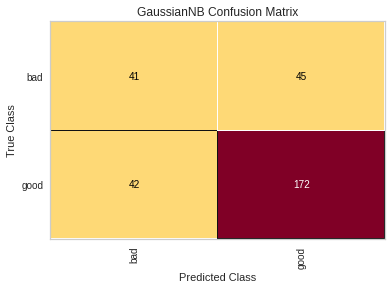

In [44]:
#visualização de matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [53]:
# Previsão com novo registro, trasformação dos atributos categoricos em numéricos
new_cred = pd.read_csv("NovoCredit.csv")
new_cred.shape
new_cred


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [54]:
#Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados
# Chamamos somente p métodp " Transform", pois a adaptação aos dados (fit) já foi feita anteriormente

new_cred = new_cred.iloc[:,0:20].values
new_cred[:,0] = labelencoder1.transform(new_cred[:,0])
new_cred[:,2] = labelencoder2.transform(new_cred[:,2])
new_cred[:,3] = labelencoder3.transform(new_cred[:,3])
new_cred[:,5] = labelencoder4.transform(new_cred[:,5])
new_cred[:,6] = labelencoder5.transform(new_cred[:,6])
new_cred[:,8] = labelencoder6.transform(new_cred[:,8])
new_cred[:,9] = labelencoder7.transform(new_cred[:,9])
new_cred[:,11] = labelencoder8.transform(new_cred[:,11])
new_cred[:,13] = labelencoder9.transform(new_cred[:,13])
new_cred[:,14] = labelencoder10.transform(new_cred[:,14])
new_cred[:,16] = labelencoder11.transform(new_cred[:,16])
new_cred[:,18] = labelencoder12.transform(new_cred[:,18])
new_cred[:,19] = labelencoder13.transform(new_cred[:,19])

In [55]:
# Resultado da previsao
naive_bayes.predict(new_cred)

array(['good'], dtype='<U4')